- 라벨이 있는 데이터와 라벨이 없는 데이터를 모두 훈련에 사용하여 학습된 모델을 다양한 기계학습 모델 (오토인코더, 서포터벡터머신, Deep Neural Network 등)의 결괏값 비교를 통하여 최적의 알고리즘을 선택한다

- 분석용 알고리즘

- 오토인코더는 출력값을 입력값과 근사하게 모델을 학습시키는 알고리즘이다.

- 심층신경망 (Deep Neural Network)는 분류를 위해 다수의 신경망을 연속적으로 쌓고, 최종적으로 각 클래스별 확률을 출력하도록 각 신경망의 모수를 업데이트하는 모델이다.

- 서포트 벡터 머신(support vector machine, SVM)은 기계 학습의 분야 중 하나로 패턴 인식, 자료 분석을 위한 지도 학습 모델이며, 주로 분류와 회귀 분석을 위해 사용한다. 일반적으로 초평면 또는 초평면들의 집합으로 구성되어 있으며, 좋은 분류를 위해서는 어떤 분류된 점에 대해서 가장 가까운 학습 데이터와 가장 먼 거리를 가지는 초평면을 찾아야 한다.

In [1]:
!unzip '/content/drive/MyDrive/data/smartfactory_dataset1.zip'

Archive:  /content/drive/MyDrive/data/smartfactory_dataset1.zip
  inflating: dataset/labeled_data.csv  
  inflating: dataset/moldset_labeled.csv  
  inflating: dataset/moldset_labeled_cn7.csv  
  inflating: dataset/moldset_labeled_rg3.csv  
  inflating: dataset/moldset_unlabeled_cn7.csv  
  inflating: dataset/moldset_unlabeled_rg3.csv  
  inflating: dataset/supervised_label_cn7.csv  
  inflating: dataset/unlabeled_data.csv  


In [2]:
import pandas as pd
import numpy as np

In [4]:
label_data = pd.read_csv('dataset/labeled_data.csv')
label_data['EQUIP_NAME'].value_counts()

,count
EQUIP_NAME,
650톤-우진2호기,7992
1800TON-우진,2
650톤-우진,2


In [5]:
label_data['PART_NAME'].value_counts()  # CN7 RG3

,count
PART_NAME,
CN7 W/S SIDE MLD'G RH,3371
CN7 W/S SIDE MLD'G LH,3365
"RG3 MOLD'G W/SHLD, LH",628
"RG3 MOLD'G W/SHLD, RH",628
"SP2 CVR ROOF RACK CTR, RH",2
JX1 W/S SIDE MLD'G RH,2


In [6]:
# 650톤-우진2호기 CN7, RG3 계열의 데이터만 사용
# 모델링은 CN7 제품의 모델링만 진행
label_data.head(3)

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,NaN,9.59,...,24.799999,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,NaN,9.60,...,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,NaN,9.60,...,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
data = label_data[label_data['EQUIP_NAME']=='650톤-우진2호기']
data['PassOrFail'] = data.loc[:,'PassOrFail'].map({'Y':0, 'N':1}).astype(int)
cn7 = data[data['PART_NAME'].apply(lambda x : 'CN7' in x)]
rg3 = data[data['PART_NAME'].apply(lambda x : 'RG3' in x)]

<ipython-input-24-4991ebfaab65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PassOrFail'] = data.loc[:,'PassOrFail'].map({'Y':0, 'N':1}).astype(int)


In [27]:
drop_cols = cn7.select_dtypes(include=(object,'category')).columns
cn7.drop(drop_cols, axis=1, inplace=True)
rg3.drop(drop_cols, axis=1, inplace=True)

<ipython-input-27-68c62c9db62b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cn7.drop(drop_cols, axis=1, inplace=True)
<ipython-input-27-68c62c9db62b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rg3.drop(drop_cols, axis=1, inplace=True)


In [49]:
df = ((cn7 == 0.0).all())
drop_index = df[df == True].index
cn7.drop(drop_index, axis=1, inplace=True)

<ipython-input-49-46f520edba25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cn7.drop(drop_index, axis=1, inplace=True)


In [50]:
df = ((rg3 == 0.0).all())
drop_index = df[df == True].index
rg3.drop(drop_index, axis=1, inplace=True)

<ipython-input-50-70633c4bfe8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rg3.drop(drop_index, axis=1, inplace=True)


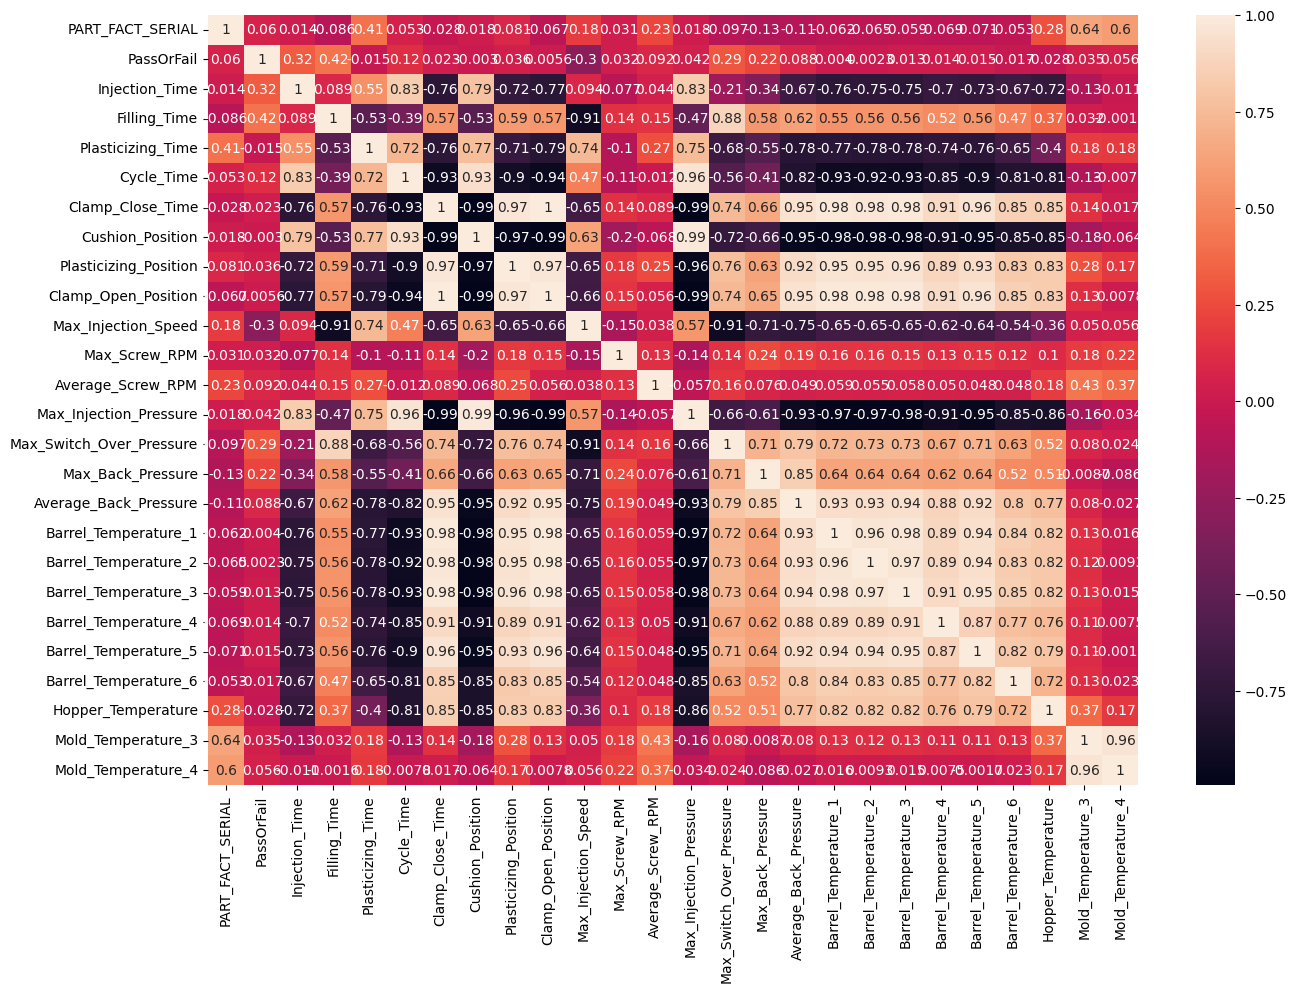

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
cor = cn7.corr()
sns.heatmap(cor,annot=True)
plt.show()


In [52]:
# 정상 vs 비정상
print(cn7['PassOrFail'].value_counts())
print(rg3['PassOrFail'].value_counts())

PassOrFail
0    6697
1      39
Name: count, dtype: int64
PassOrFail
0    1224
1      32
Name: count, dtype: int64


In [53]:
cn7_y = cn7[cn7['PassOrFail']==0]
cn7_n = cn7[cn7['PassOrFail']==1]
rg3_y = rg3[rg3['PassOrFail']==0]
rg3_n = rg3[rg3['PassOrFail']==1]

In [54]:
# 오토 인코더는 비지도학습 passorfail 항목을 제고
cn7_y.drop('PassOrFail', axis=1, inplace=True)
cn7_n.drop('PassOrFail', axis=1, inplace=True)

<ipython-input-54-c9fcadca780b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cn7_y.drop('PassOrFail', axis=1, inplace=True)
<ipython-input-54-c9fcadca780b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cn7_n.drop('PassOrFail', axis=1, inplace=True)


In [66]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cn7_y = scaler.fit_transform(cn7_y)
cn7_n = scaler.fit_transform(cn7_n)

In [67]:
# cn7_y = tf.convert_to_tensor(cn7_y)
# cn7_n = tf.convert_to_tensor(cn7_n)

In [69]:
# 데이터를 분리
from sklearn.model_selection import train_test_split
cn7_y_train, cn7_y_test = train_test_split(cn7_y, test_size=0.2, random_state=42,shuffle=False)

In [70]:
cn7_y_train.shape, cn7_y_test.shape, cn7_n.shape

((5357, 25), (1340, 25), (39, 25))

In [71]:
type(cn7_y_train)

numpy.ndarray

In [ ]:
import tensorflow as tf
# 인코더
encorder = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
])
# 디코더
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(cn7_y.shape[1], activation='sigmoid'),
])
input_data = tf.keras.Input(shape=(cn7_y.shape[1],))
encoded_data = encorder(input_data)
encoded_data = decoder(encoded_data)

autoencoder = tf.keras.Model(inputs=input_data, outputs = encoded_data)
autoencoder.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
early_stoping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
autoencoder.fit(cn7_y_train, cn7_y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stoping])

Epoch 1/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0167 - loss: 0.0584 - val_accuracy: 0.9776 - val_loss: 0.0091
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8920 - loss: 0.0037 - val_accuracy: 0.9813 - val_loss: 0.0022
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9150 - loss: 0.0018 - val_accuracy: 0.9272 - val_loss: 0.0012
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8917 - loss: 8.3788e-04 - val_accuracy: 0.8442 - val_loss: 6.8771e-04
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8066 - loss: 5.0505e-04 - val_accuracy: 0.9188 - val_loss: 4.8697e-04
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8303 - loss: 3.8566e-04 - val_accuracy: 0.9123 - val_loss: 4.1442e-04
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8388 - loss: 3.2005e-04 - val_accuracy: 0.9132 - val_loss: 3.6860e-04
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

In [ ]:
# 디코더

((5357, 25), (1340, 25), (39, 25))